### Ejemplos simples de convolución

Veremos cómo hacer convuciones simples, y qué tipo de información extraen de algunas imágenes.

(7291, 257)
(2007, 257)


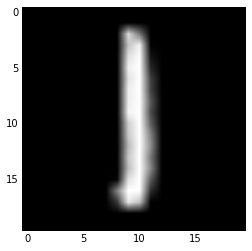

6


In [5]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_rows = 10
import matplotlib.cm as cm


df_train = pd.read_csv('zip_train.csv', sep=',')
df_test = pd.read_csv('zip_test.csv', sep=',')
print df_train.shape
print df_test.shape
df_train

x_train_1 = np.float32(df_train.iloc[:,1:257].values)
x_test_1 = np.float32(df_test.iloc[:,1:257].values)
y_train = np.int32(df_train['X1'])
y_test = np.int32(df_test['X1'])

%matplotlib inline
plt.imshow(np.lib.pad(x_train_1[7,].reshape(16,16), (2,2), mode='constant', constant_values=-1),
          cmap = cm.Greys_r)
plt.show()
print y_train[0]

En la siguiente función aplicamos un filtro de convolución. Agregamos relleno alrededor de la matriz original para poder aplicar a cada pixel de la imagen original (aunque esto se puede ignorar y producir una imagen filtrada más chica). En este caso, como se trata de un filtro de tamaño 3x3, basta con agregar un pixel alrededor de la imagen (-1 que en este caso representa negro).

(16, 16)


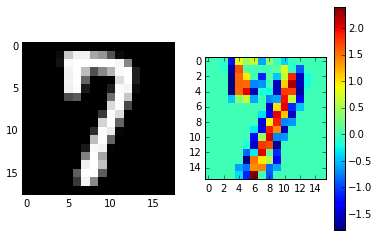

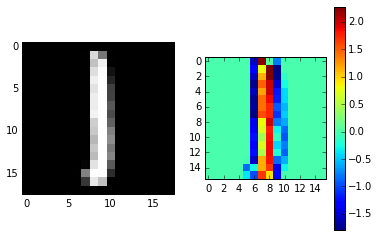

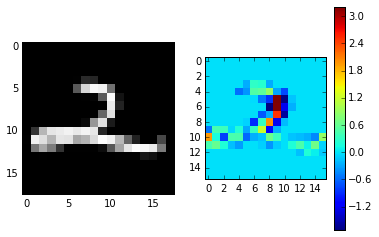

In [15]:
from scipy import signal

def filtrar_imagen(n, filtro):
    im_mat = x_train_1[n,].reshape(16,16)
    imagen = np.lib.pad(im_mat, (1,1), mode='constant', constant_values=-1)
    filtrada =  signal.convolve(imagen, filtro, mode = 'valid')
    fig = plt.figure()
    a = fig.add_subplot(1,2,1)

    plt.imshow(np.lib.pad(im_mat, (1,1), mode='constant', constant_values=-1),
          cmap = cm.Greys_r, interpolation='none')
    a=fig.add_subplot(1,2,2)
    plt.imshow(filtrada, interpolation='none')#, cmap = cm.Greys_r)
    plt.colorbar()
    return filtrada

# este filtro puede usarse para detectar bordes verticales
filtro = np.array([[0,0,0],[-1,2,-1],[0,0,0]])
salida = filtrar_imagen(15, filtro)
print salida.shape
salida = filtrar_imagen(7, filtro)
salida = filtrar_imagen(78, filtro)

[[ 0 -1  0]
 [ 0  2  0]
 [ 0 -1  0]]


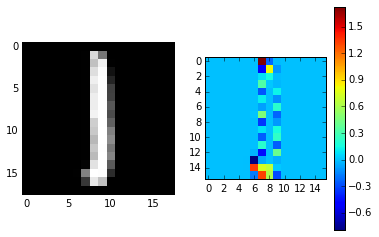

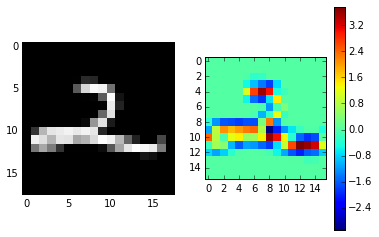

In [16]:
filtro = np.array([[0,-1,0],[0,2,0],[0,-1,0]])
print filtro
salida = filtrar_imagen(7, filtro)
salida = filtrar_imagen(78, filtro)

Ver también esta [página](http://setosa.io/ev/image-kernels/) con ejemplos